In [1]:
from init import *
from helpers_analyses import *


Getting english data
Getting french data
Getting emotion words and bird names
number of overlapping words between Leuven and Rosch: 25
correlation between Leuven and Rosch ratings: (0.9519771567894879, 2.5885716906113406e-13)


In [2]:
# precompute measures
ks = [100]
t1, t2 = 9, -1
pos = NOUN

measures_emotion_eng = {}
measures_emotion_fra = {}
for k in ks:
    measures_emotion_eng[k] = nn_measure_over_words(words_eng, pos, pos_data, data, t1, t2, k)
    measures_emotion_fra[k] = nn_measure_over_words(words_fr, pos, pos_data_fr, data_fr, t1, t2, k)


English emotion words
Pearson between frequency and change r=-0.489169, p-value=0.000000
Pearson between all-noun and emotion-only r=0.750858, p-value=0.000000
                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     18.30
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           7.88e-10
Time:                        14:41:55   Log-Likelihood:                 106.43
No. Observations:                 123   AIC:                            -204.9
Df Residuals:                     119   BIC:                            -193.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t  

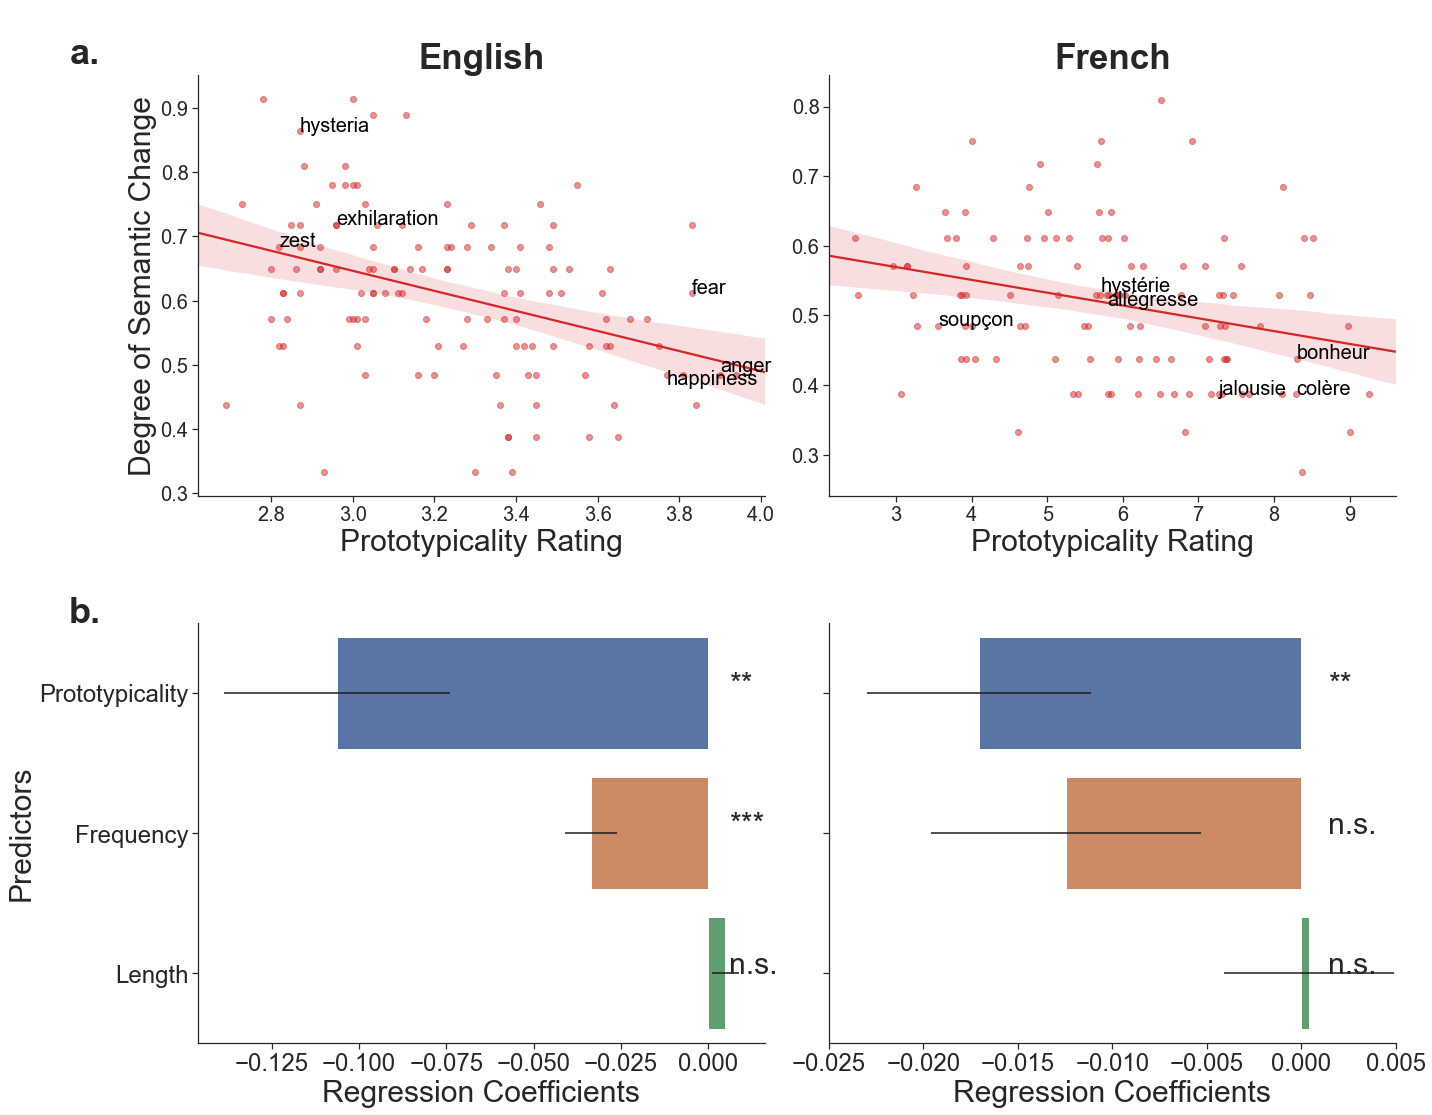

In [3]:
# emotion-word only analyses
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style("ticks")

def annotate_scatter(ax, example_words, proto, changes):
    for w in example_words:
        x = proto[w]
        y = changes[w]
        if w == 'anger' or w == 'hystérie':
            ax.annotate(w, xy=(x,y), xytext=(x,y+0.005), color='black', fontsize=20)
        elif w == 'happiness' or w == 'allégresse':
            ax.annotate(w, xy=(x,y), xytext=(x,y-0.015), color='black', fontsize=20)
        else:
            ax.annotate(w, xy=(x,y), xytext=(x,y), color='black', fontsize=20)
    return ax

def probing_corrs(words, freqs, changes, changes2):
    r_freq, p_freq = pearsonr([freqs[w] for w in words], [changes[w] for w in words])
    r_change, p_change = pearsonr([changes[w] for w in words], [changes2[w] for w in words])
    print('Pearson between frequency and change r=%f, p-value=%f' % (r_freq, p_freq))
    print('Pearson between all-noun and emotion-only r=%f, p-value=%f' % (r_change, p_change))

eng_examples = [
    'hysteria', 'zest', 'exhilaration',
    'happiness', 'anger', 'fear',
]
fra_examples = [
    'hystérie', 'allégresse', 'soupçon',
    'bonheur', 'colère', 'jalousie'
]
    
ks = [15, 20, 25, 30, 35]
t1, t2 = 9, -1
time_range = list(range(1800, 2000, 10))
pos = NOUN

vectors_emotions = {w: data[w] for w in words_eng if w in data}
vectors_emotions_fr = {w: data_fr[w] for w in words_fr if w in data_fr}
measures_emotion_eng_bounded = {}
measures_emotion_fra_bounded = {}
for k in ks:
    measures_emotion_eng_bounded[k] = nn_measure_over_words(words_eng, pos, pos_data, vectors_emotions, t1, t2, k)
    measures_emotion_fra_bounded[k] = nn_measure_over_words(words_fr, pos, pos_data_fr, vectors_emotions_fr, t1, t2, k)

# regression
t_to_use = 1890
k = 25
k2 = 100

print('English emotion words')
emotion_eng_words = measures_emotion_eng_bounded[k].keys()
freqs = {w: np.log(freqs_all[w][t_to_use]) for w in emotion_eng_words}
probing_corrs(emotion_eng_words, freqs, measures_emotion_eng_bounded[k], measures_emotion_eng[k2])
result_eng, n_eng, pr_eng, pp_eng, pr2_eng, pp2_eng = regression_results(emotion_eng_words, measures_emotion_eng_bounded[k], proto, freqs)
print('----------------------------------------', '\n', '\n', '\n', '\n',)
print('French emotion words')
emotion_fra_words = measures_emotion_fra_bounded[k].keys()
freqs = {w: np.log(freqs_all_fr[w][t_to_use]) for w in emotion_fra_words}
probing_corrs(emotion_fra_words, freqs, measures_emotion_fra_bounded[k], measures_emotion_fra[k2])
result_fra, n_fra, pr_fra, pp_fra, pr2_fra, pp2_fra = regression_results(emotion_fra_words, measures_emotion_fra_bounded[k], proto_fr, freqs)

fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20, 16))
axes[0][0].set_title('English', fontsize=35, weight='bold')
axes[0][1].set_title('French', fontsize=35, weight='bold')

axes[0][0] = plot_change_scatter(axes[0][0], emotion_eng_words, proto, measures_emotion_eng_bounded[k])
axes[0][1] = plot_change_scatter(axes[0][1], emotion_fra_words, proto_fr, measures_emotion_fra_bounded[k])
axes[0][0] = annotate_scatter(axes[0][0], eng_examples, proto, measures_emotion_eng_bounded[k])
axes[0][1] = annotate_scatter(axes[0][1], fra_examples, proto_fr, measures_emotion_fra_bounded[k])
axes[0][1].set_ylabel('')

axes[1][0] = plot_coefficents(axes[1][0], result_eng, ['Prototypicality', 'Frequency', 'Length'])
axes[1][1] = plot_coefficents(axes[1][1], result_fra, ['Prototypicality', 'Frequency', 'Length'])
axes[1][1].set_ylabel('')
axes[1][1].set_yticklabels([])
axes[1][1].set_xlim((-0.025, 0.005))

axes[0,0].annotate('b.',
            xy=(-0.2, 0.45), xytext=(-0.2, 0.45),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')
axes[0,0].annotate('a.',
            xy=(-0.2, 0.95), xytext=(-0.2, 0.95),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=36, weight='bold', ha='center', va='center')

sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure_bounded.'+img_format, format=img_format, bbox_inches='tight')


